<a href="https://colab.research.google.com/github/szn5400/CO2_all/blob/main/STT_gas_complete_debug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is code for Gas Saturation output for 500 epochs 
# Data is shuffled
# Rescaling done with data from the full dataset

import sys
sys.path.append('/content/drive/MyDrive/code/MLP')

from read_data_unscaled import read
import os
import numpy as np
import glob
import collections
from read_model import MLP_single
from data_to_numpy_unscaled import numpy_single


#read data
all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs = read()

#convert to numpy
features1_tr,target1_tr,features1_te,target1_te,permeability_min,permeability_max,porosity_min,porosity_max,surf_inj_rate_min,surf_inj_rate_max,min_target,max_target = numpy_single(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_saturations)


All files: ['/content/drive/MyDrive/data/k1r1-h.out', '/content/drive/MyDrive/data/k1r2-h.out', '/content/drive/MyDrive/data/k1r3-h.out', '/content/drive/MyDrive/data/k1r4-h.out', '/content/drive/MyDrive/data/k1r5-h.out', '/content/drive/MyDrive/data/k1r6-h.out', '/content/drive/MyDrive/data/k1r7-h.out', '/content/drive/MyDrive/data/k1r8-h.out', '/content/drive/MyDrive/data/k1r9-h.out', '/content/drive/MyDrive/data/k2r1-h.out', '/content/drive/MyDrive/data/k2r2-h.out', '/content/drive/MyDrive/data/k2r3-h.out', '/content/drive/MyDrive/data/k2r4-h.out', '/content/drive/MyDrive/data/k2r5-h.out', '/content/drive/MyDrive/data/k2r6-h.out', '/content/drive/MyDrive/data/k2r7-h.out', '/content/drive/MyDrive/data/k2r8-h.out', '/content/drive/MyDrive/data/k2r9-h.out', '/content/drive/MyDrive/data/k3r1-h.out', '/content/drive/MyDrive/data/k3r2-h.out', '/content/drive/MyDrive/data/k3r3-h.out', '/content/drive/MyDrive/data/k3r4-h.out', '/content/drive/MyDrive/data/k3r5-h.out', '/content/drive/MyDriv

In [ ]:
one_unit_data_chunk = 1*71*25*25*3

In [ ]:
import matplotlib.pyplot as plt

def display_normalized_data(start_index, end_index, time_scale,plot_target):
  index = start_index+(time_scale*25*25*3)
  plot_x_target = [[0 for i in range(25)] for j in range(25)]
  plot_y_target = [[0 for i in range(25)] for j in range(25)]
  plot_z_target = [[0 for i in range(25)] for j in range(25)]

  for i in range(25):
      for j in range(25):
          plot_x_target[i][j] = plot_target[index]
          index+=1

          plot_y_target[i][j] = plot_target[index]
          index+=1

          plot_z_target[i][j] = plot_target[index]
          index+=1

  plt.imshow(np.squeeze(plot_x_target))
  plt.title("z=1")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_y_target))
  plt.title("z=2")
  plt.colorbar()
  plt.show()

  plt.imshow(np.squeeze(plot_z_target))
  plt.title("z=3")
  plt.colorbar()
  plt.show()

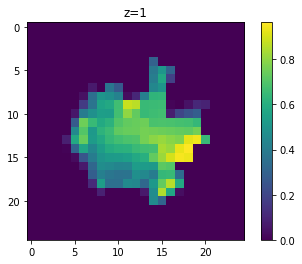

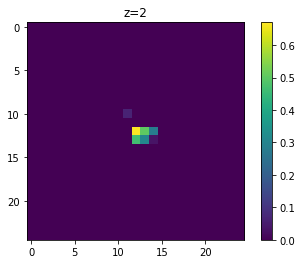

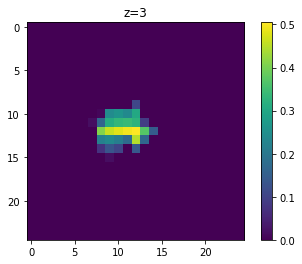

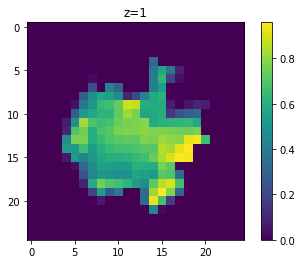

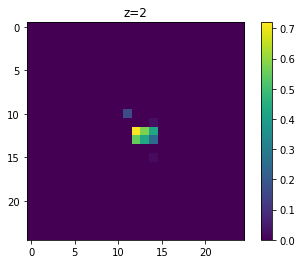

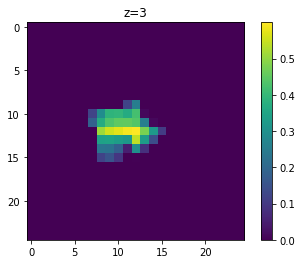

In [ ]:
for i in range(16,18):
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target1_tr)

In [ ]:
from data_to_numpy_raw import numpy_single_raw

features1_tr_raw,target1_tr_raw,features1_te_raw,target1_te_raw,permeability_min_raw,permeability_max_raw,porosity_min_raw,porosity_max_raw,surf_inj_rate_min_raw,surf_inj_rate_max_raw,min_target_raw,max_target_raw = numpy_single_raw(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_saturations)

27 71 25 25 3
(3594375, 7)
(3594375, 1)
all min at one place: [0. 0. 0. 0. 0. 0. 0.]
all max at one place: [1.00e+00 1.00e+00 1.00e+00 1.00e+00 8.14e+01 3.55e-01 9.00e+03]
Debug all vals:
all training min: [0. 0. 0. 0. 0. 0. 0.]
all training max: [1.00e+00 1.00e+00 1.00e+00 1.00e+00 8.14e+01 3.55e-01 9.00e+03]
all testing min: [0. 0. 0. 0. 0. 0. 0.]
all testing max: [1.00e+00 1.00e+00 1.00e+00 1.00e+00 8.14e+01 3.54e-01 3.00e+03]
min and max at training target: [0.] [0.822]
min and max at testing target: [0.] [0.801]
(3195000, 7)
(3195000, 1)
(399375, 7)
(399375, 1)


data point at i 5


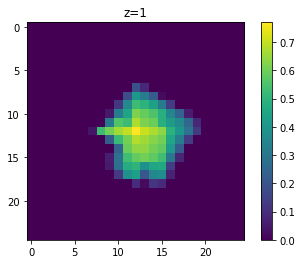

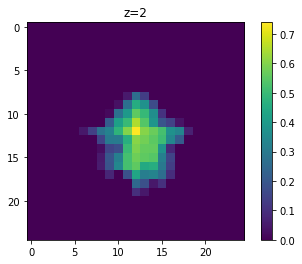

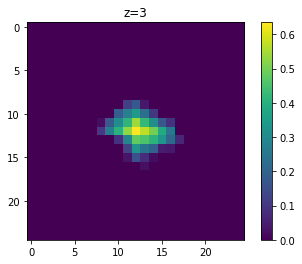

data point at i 6


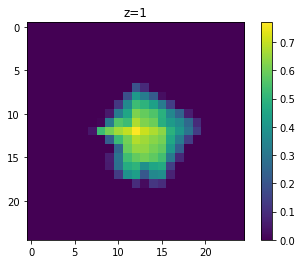

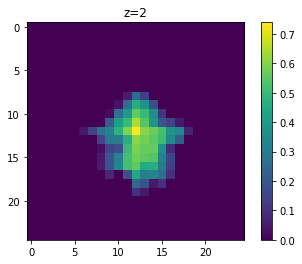

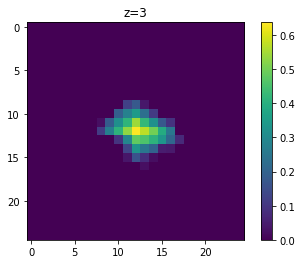

data point at i 7


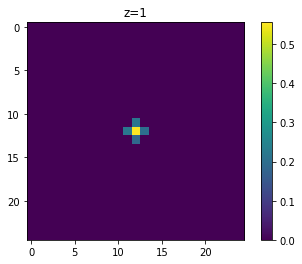

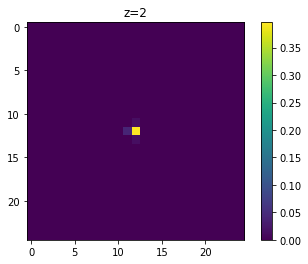

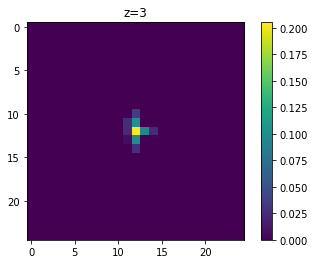

data point at i 8


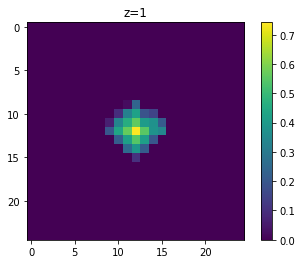

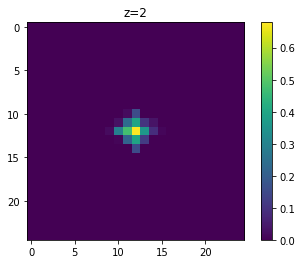

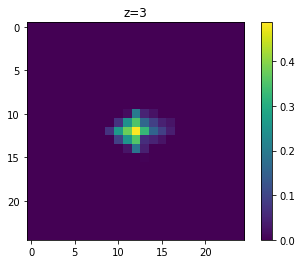

data point at i 9


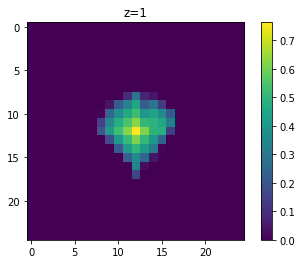

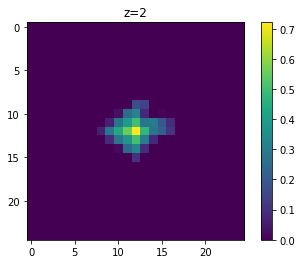

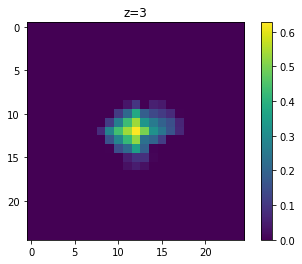

data point at i 10


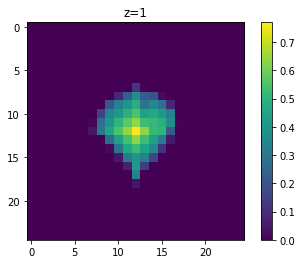

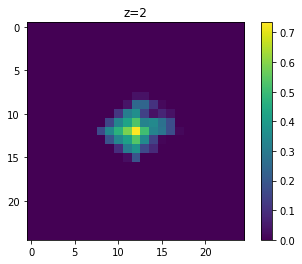

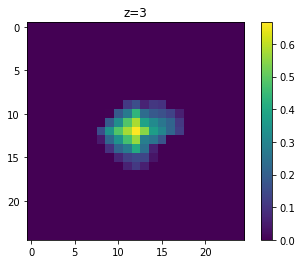

data point at i 11


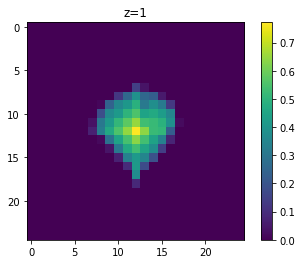

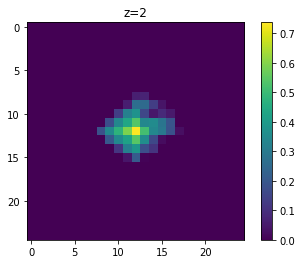

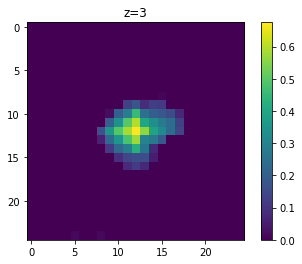

In [ ]:
for i in range(5,12):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target1_tr_raw)

data point at i 0


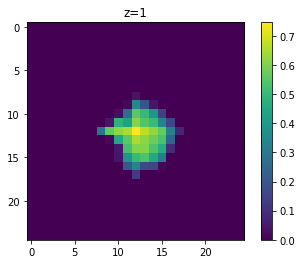

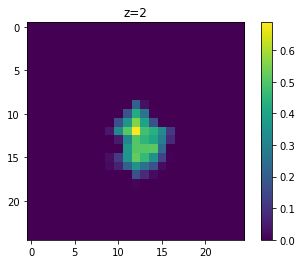

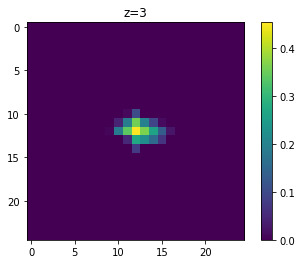

data point at i 1


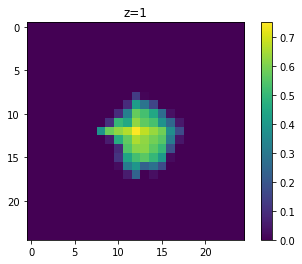

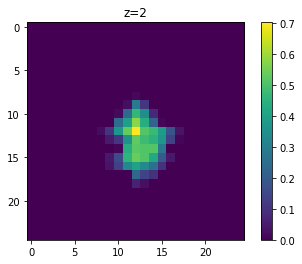

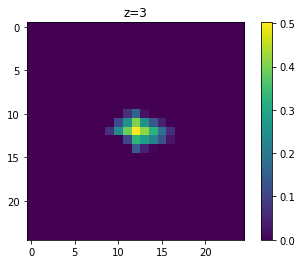

data point at i 2


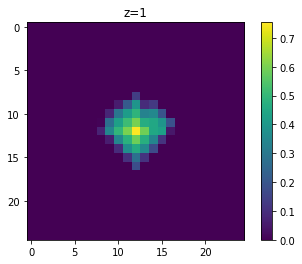

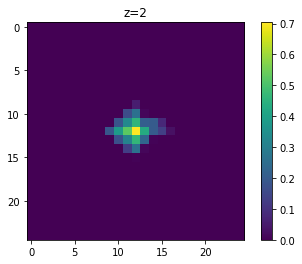

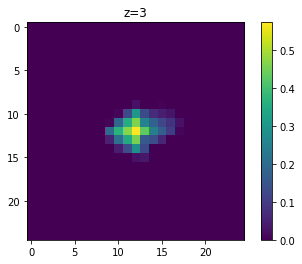

In [ ]:
for i in range(3):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target1_te_raw)

In [ ]:
len_test = len(target1_te_raw)
len_test_except_3 = (len_test//3)
x = np.linspace(start=0,stop=len_test_except_3,num=len_test_except_3)

In [ ]:
error_base_line_1_part = [0]
error_base_line_2_part = [0]
error_base_line_3_part = [0]
for i in range(3,len_test,3):
  error_base_line_1_part+=[target1_te_raw[i]-target1_te_raw[i-3]]
  error_base_line_2_part+=[target1_te_raw[i+1]-target1_te_raw[i-2]]
  error_base_line_3_part+=[target1_te_raw[i+2]-target1_te_raw[i-1]]

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


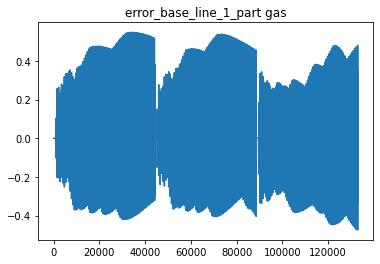

In [ ]:
plt.plot(x,error_base_line_1_part)
plt.title("error_base_line_1_part gas")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


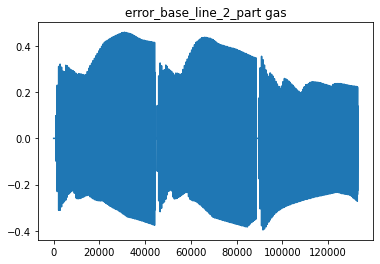

In [ ]:
plt.plot(x,error_base_line_2_part)
plt.title("error_base_line_2_part gas")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


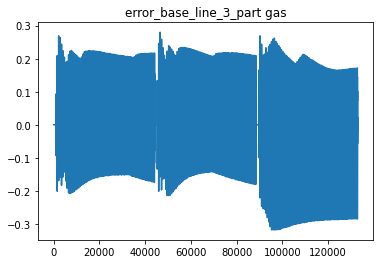

In [ ]:
plt.plot(x,error_base_line_3_part)
plt.title("error_base_line_3_part gas")
plt.show()

In [ ]:
json_file = open('model_myrescale_500_shuf_STT_gas.json', 'r')

In [ ]:
from keras.models import model_from_json

loaded_model_json = json_file.read()

In [ ]:
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.load_weights("weights_myrescale_500_shuf_STT_gas.h5")

In [ ]:
target_got = loaded_model.predict([features1_te])

12481/12481 [==============================] - 18s 1ms/step


data point at i 0


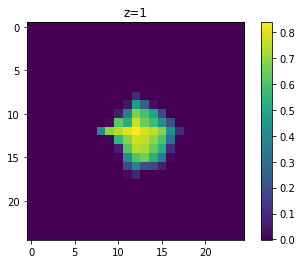

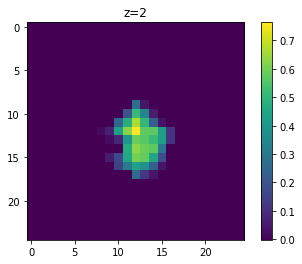

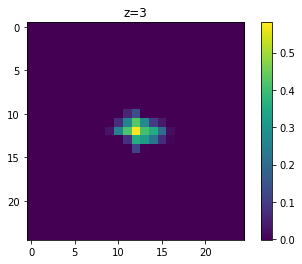

data point at i 1


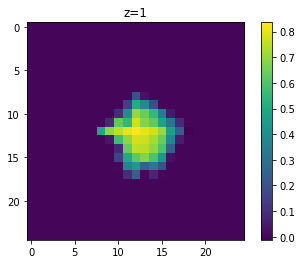

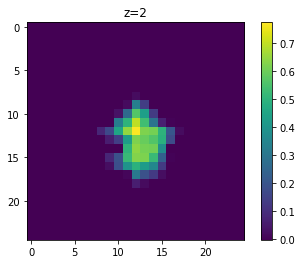

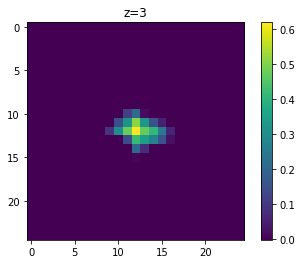

data point at i 2


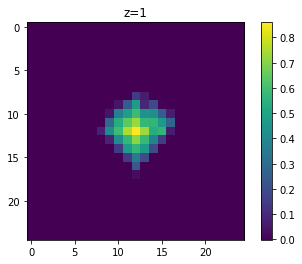

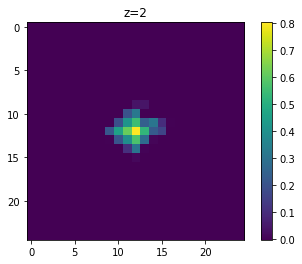

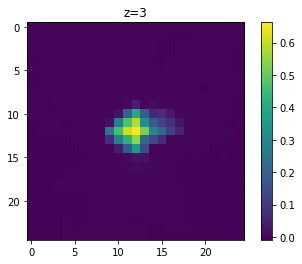

In [ ]:
for i in range(3):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target_got)

In [ ]:
target_got_rescaled = [0]*len(target_got)
for i in range(len(target_got)):
  target_got_rescaled[i] = (target_got[i]*(max_target-min_target))+min_target

data point at i 0


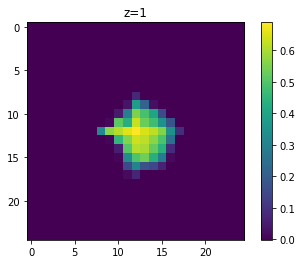

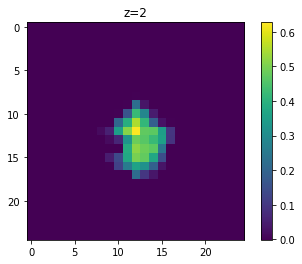

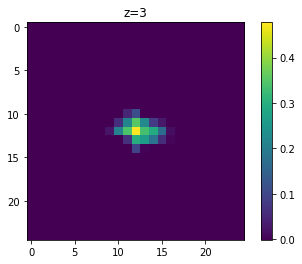

data point at i 1


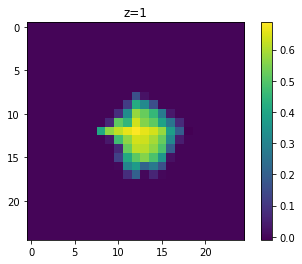

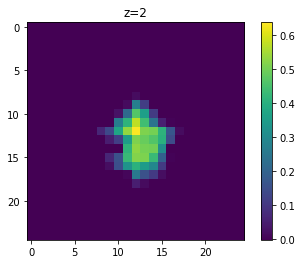

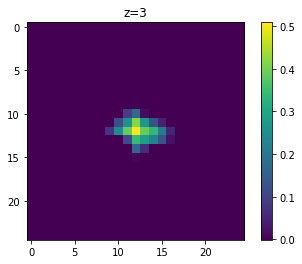

data point at i 2


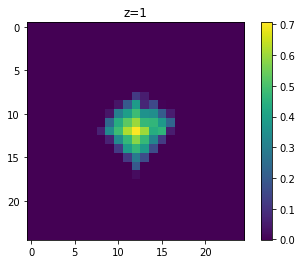

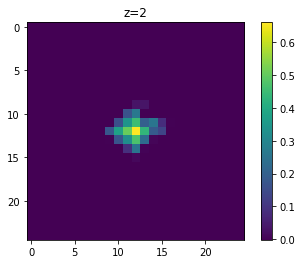

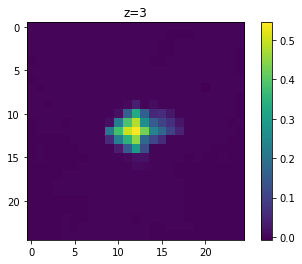

In [ ]:
for i in range(3):
  print('data point at i',i)
  start_index = i*one_unit_data_chunk
  end_index = (i+1)*one_unit_data_chunk
  display_normalized_data(start_index, end_index,30,target_got_rescaled)

In [ ]:
error_target_1_part = [0]
error_target_2_part = [0]
error_target_3_part = [0]
for i in range(0,len_test-3,3):
  error_target_1_part+=[target1_te_raw[i]-target_got_rescaled[i]]
  error_target_2_part+=[target1_te_raw[i+1]-target_got_rescaled[i+1]]
  error_target_3_part+=[target1_te_raw[i+2]-target_got_rescaled[i+2]]

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


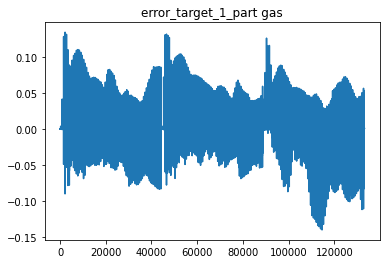

In [ ]:
plt.plot(x,error_target_1_part)
plt.title("error_target_1_part gas")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


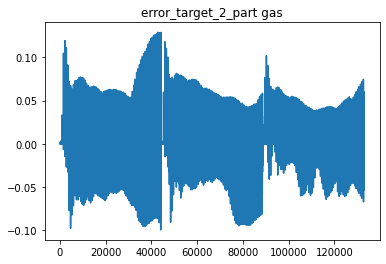

In [ ]:
plt.plot(x,error_target_2_part)
plt.title("error_target_2_part gas")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


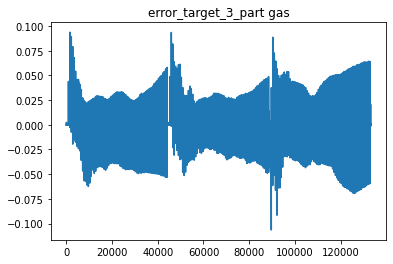

In [ ]:
plt.plot(x,error_target_3_part)
plt.title("error_target_3_part gas")
plt.show()

In [ ]:
sq_error_target_1_part = np.square(error_target_1_part)
sq_error_target_2_part = np.square(error_target_2_part)
sq_error_target_3_part = np.square(error_target_3_part)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

In [ ]:
MSE = (sum(sq_error_target_1_part)+sum(sq_error_target_2_part)+sum(sq_error_target_3_part))/(len(error_target_1_part)+len(error_target_2_part)+len(error_target_3_part))

In [ ]:
print(sq_error_target_1_part)

[0 array([1.54711406e-08]) array([2.58207452e-08]) ...
 array([5.25785898e-07]) array([5.4673824e-07]) array([6.12358079e-07])]


In [ ]:
print(MSE)

[4.34753567e-05]
